In [1]:
using Plots, LinearAlgebra

In [21]:
cd(s"C:\Users\User\Desktop\Mycop\plots")

https://doi.org/10.1119/10.0000189

$$
\vec \lambda = \frac{\vec n + (\gamma-1)(\vec n\cdot\vec\beta)\vec \beta + \gamma\vec\beta}{\gamma(1 + \vec\beta\cdot\vec n)}
$$

$$
\vec E = \frac{\Delta\vec r/\gamma^2 + \Delta\vec r(\vec R\cdot\vec a) - \vec a(\vec R\cdot\Delta\vec r)}{\left((t-t^\prime)-\vec R\cdot\vec\beta\right)^3}
$$

$\Delta\vec r = \vec R - \vec r_0 - (t-t^\prime)\vec\beta$  
$t - t^\prime = r = \sqrt{x^2+y^2}$  
$t^\prime = t - \sqrt{x^2+y^2}$

In [69]:
function E(r, t)
    r -= x₀(t)
    t′ = t - hypot(r...)
    β = v₀ₓ(t′)
    a = a₀ₓ(t′)
    γ = 1/sqrt(1 - β ⋅ β)
    Δr = r - (t-t′)*β
    vec_E =  ( Δr/γ^2 + Δr*(r ⋅ a) - a*(r ⋅ Δr) ) / ( t-t′ - r ⋅ β )^3
    hypot(vec_E...)
end

function λ(t, t′, ϕ)
    n = [cos(ϕ) sin(ϕ)]
    β = v₀ₓ(t′) 
    nβ = n ⋅ β
    γ = 1/sqrt(1-β ⋅ β)
    vec_λ = ( n + (γ-1)*nβ*β + γ*β ) / ( γ*(1+nβ) )
    return x₀(t′) + (t-t′)*vec_λ
end;

### Bremsstrahlung

In [3]:
# двукомпонентные вектора
x₀(t) = begin
    [t<=0 ? t/√2 :
    0<t<=1 ? 1 + t/√2 - sqrt(1+t^2) :
    1 - 1/√2 0.0]
end

v₀ₓ(t) = begin
    [t<=0 ? 1.0/√2 :
    0<t<=1 ? 1.0/√2 - t/sqrt(1+t^2) : 0.0 0.0]
end

a₀ₓ(t) = begin
    [0<t<=1 ? -1.0/sqrt(1+t^2)^3 : 0.0 0.0]
end;

### Oscillator

In [70]:
x₀(t)  = [ 0.0 t<0 ? 0.0 : 0.8/π * sin(π*t) ]
v₀ₓ(t) = [ 0.0 t<0 ? 0.0 : 0.8cos(π*t) ]
a₀ₓ(t) = [ 0.0 t<0 ? 0.0 : -0.8π * sin(π*t) ];

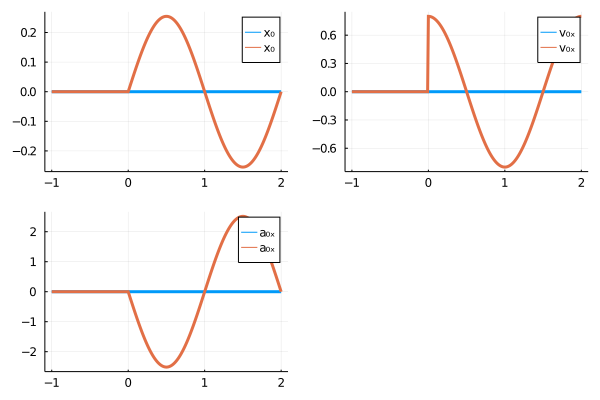

In [8]:
tt = -1:0.01:2
ploter(fun) = plot(tt, vcat(fun.(tt)...), lab = "$(fun)")

plot(ploter(x₀), ploter(v₀ₓ), ploter(a₀ₓ), line = 3 )

In [9]:
t = 3.0
X = range(-4, stop = 4, length = 128)
Y = range(-4, stop = 4, length = 128)  
Z = [ E([x y], t ) for y in Y, x in X ];

In [10]:
maximum(Z)

1623.1534708088388

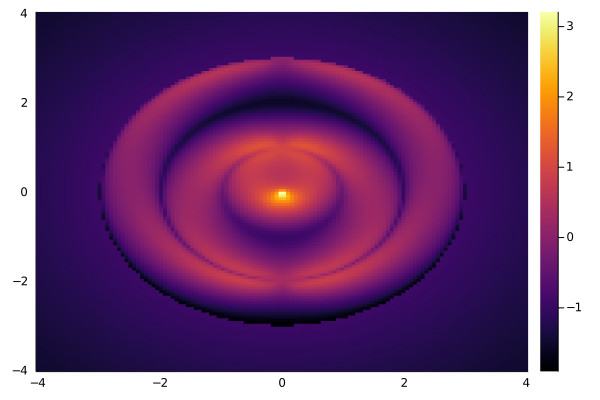

In [11]:
heatmap(X, Y, log10.(Z))

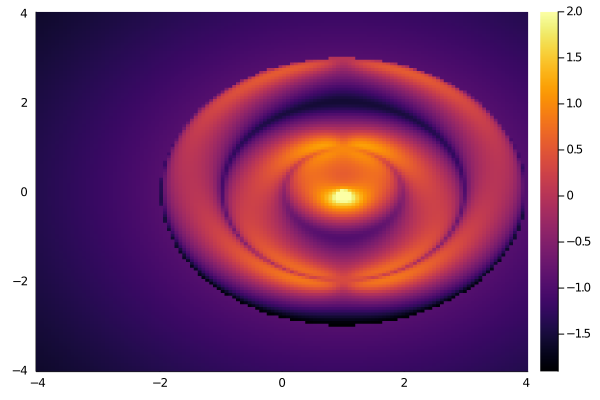

In [203]:
heatmap(X, Y, clamp.(log10.(Z), -2, 2))

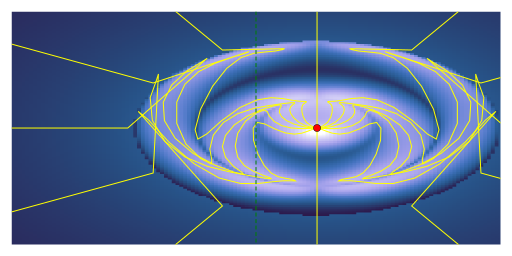

In [204]:
heatmap(X, Y, clamp.(log10.(Z), -2, 2), # oбрезание
    legend = false, ticks = nothing, border = :none, size = (512, 256), c = :devon  ) # :grays

for fi in π/6:π/6:2π
    zz = vcat( [λ(t, tt, fi) for tt in t-10:0.1:t ]... );
    plot!(zz[:,1], zz[:,2], line = (1, :yellow), )
end
scatter!([x₀(t)[1]],[x₀(t)[2]], c = :red)
vline!([0.0], c = :green, line = (1, :dash))
yaxis!((Y[1], Y[end]))
xaxis!((X[1], X[end]))

In [71]:
@time for (i, t) in enumerate(range(0, stop = 8, length = 64)) # картинки для гифки
    Z = [ E([x y], t) for y in Y, x in X ];
    heatmap(X, Y, clamp.(log10.(Z), -2, 2), 
        legend = false, ticks = nothing, border = :none, size = (512, 256)  ) # 
    # , c = :grays

    for fi in π/6:π/6:2π # t-10 на сколько назад во времени
        zz = vcat( [λ(t, tt, fi) for tt in t-10:0.01:t ]... )  # 0.01 четкость линий поля
        plot!(zz[:,1], zz[:,2], line = (1, :yellow), )
    end
    scatter!([x₀(t)[1]],[x₀(t)[2]], c = :red) # , title = "t = $(round(t, digits = 1))"
    #vline!([0.0], c = :green, line = (1, :dash))
    yaxis!((Y[1], Y[end]))
    xaxis!((X[1], X[end]))

    savefig("img$i.png")
end

 19.196218 seconds (262.95 M allocations: 6.260 GiB, 4.57% gc time)


## Синхротрон

https://cyberleninka.ru/article/n/problemy-teorii-atoma-vodoroda-i-fotonnoe-vzaimodeystvie-elektrona-i-protona

https://cyberleninka.ru/article/n/sinhrotron-kak-makroatom

In [56]:
function λ₂(t, t′, ϕ)
    β = radi*omeg
    γ = 1/sqrt(1-β^2)
    ψt = omeg*t′ + 2atan( β-tan( 0.5γ*omeg*t′ + atan( γ*( β-tan(0.5ϕ) ) ) )/γ )
    
    return x₀(t′) + (t-t′)*[cos(ψt) sin(ψt)]
end;

radi = 0.2
omeg = 0.4/radi
peri = 2π/omeg

x₀(t) = radi*[cos(omeg*t) sin(omeg*t)]
v₀ₓ(t) = radi*omeg*[-sin(omeg*t) cos(omeg*t)]
a₀ₓ(t) = -omeg^2 * x₀(t);

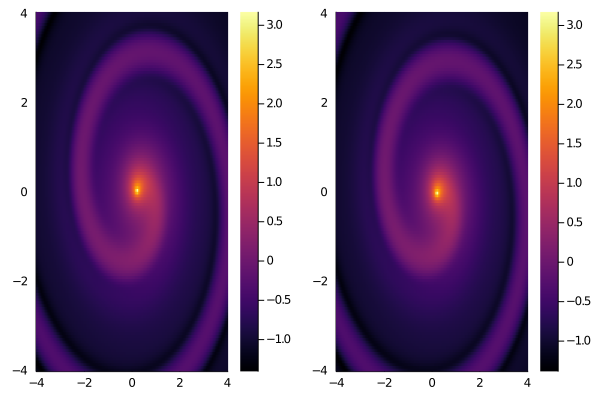

In [66]:
X = range(-4, stop = 4, length = 128)
Y = range(-4, stop = 4, length = 128) 

t = 3.0
Z = [ E([x y], t ) for y in Y, x in X ];
heatmap(X, Y, log10.(Z))

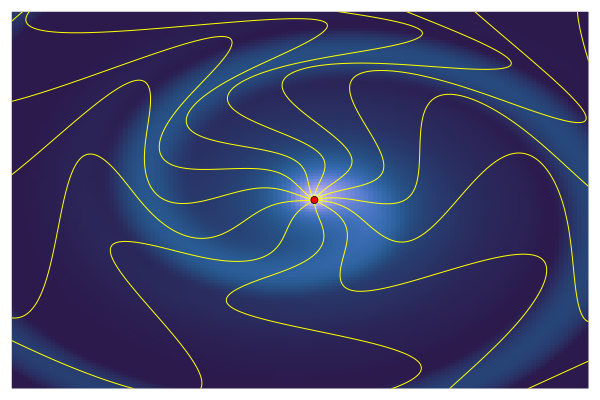

In [61]:
V₀ = v₀ₓ(0)
V² = V₀ ⋅ V₀
Vn = normalize(V₀)

heatmap(X, Y, clamp.(log10.(Z), -1, 4), # oбрезание
    legend = false, ticks = nothing, border = :none, size = (600, 400), c = :devon  ) # :grays

for alph in π/6:π/6:2π
    nn = [cos(alph) sin(alph)]
    fvec = (sqrt(1-V²)-1) * (Vn ⋅ nn) * Vn + nn
    fi = angle(fvec[1] + im*fvec[2])
    
    Vv = V₀ ⋅ [cos(fi) sin(fi)]
    μ = Vv + sqrt( 1-V² + Vv^2 )
    fvec = V₀ - μ*[cos(fi) sin(fi)]
    fi = angle(fvec[1] + im*fvec[2])
    
    zz = vcat( [λ(t, tt, fi) for tt in t-6:0.01:t ]... );
    plot!(zz[:,1], zz[:,2], line = (1, :yellow), )
end
scatter!([x₀(t)[1]],[x₀(t)[2]], c = :red)
yaxis!((Y[1], Y[end]))
xaxis!((X[1], X[end]))

In [68]:
@time for (i, t) in enumerate(range(0, stop = 3, length = 16)) # картинки для гифки
    Z = [ E([x y], t) for y in Y, x in X ];
    heatmap(X, Y, clamp.(log10.(Z), -1, 4), # oбрезание
        legend = false, ticks = nothing, border = :none, size = (600, 400)  )

    for alph in π/4:π/4:2π
        nn = [cos(alph) sin(alph)]
        fvec = (sqrt(1-V²)-1) * (Vn ⋅ nn) * Vn + nn
        fi = angle(fvec[1] + im*fvec[2])

        Vv = V₀ ⋅ [cos(fi) sin(fi)]
        μ = Vv + sqrt( 1-V² + Vv^2 )
        fvec = V₀ - μ*[cos(fi) sin(fi)]
        fi = angle(fvec[1] + im*fvec[2])

        zz = vcat( [λ(t, tt, fi) for tt in t-6:0.005:t ]... );
        plot!(zz[:,1], zz[:,2], line = (1, :yellow), )
    end
    scatter!([x₀(t)[1]],[x₀(t)[2]], c = :red)
    yaxis!((Y[1], Y[end]))
    xaxis!((X[1], X[end]))

    savefig("img$i.png")
end

  5.974609 seconds (80.24 M allocations: 1.845 GiB, 4.32% gc time)


### Атом Резерфорда

In [10]:
function rk4(f, x, y, h)
    k1 = h * f(x       , y        )
    k2 = h * f(x + 0.5h, y + 0.5k1)
    k3 = h * f(x + 0.5h, y + 0.5k2)
    k4 = h * f(x +    h, y +    k3)

    return y + (k1 + 2*(k2 + k3) + k4)/6.0
end

rk4 (generic function with 1 method)

In [7]:
const nm = 1e-9 # m
const ps = 1e-12 # s
const fs = 1e-15 # s

const c = 299792458 # m/s
const ħ = 1.0546e-34 # J*s
const e = 1.6022e-19 # Kl
const mₑ = 9.1094e-31 # kg
const ε₀ = 8.8542e-12 # F/m

const k = 1/(4π*ε₀) # 8.987552e9 # N*m^2/q^2
const rₑ = k*e^2 / (mₑ*c^2) # 2.81794e-15 # m
const a₀ = 0.052917720859nm # 4π*ε₀*ħ^2 / (mₑ*q^2)
const α = 1/137.036 # e^2/(ħ*c)
const vₑ = α*c # 2187 km/c

2.187691249014857e6

In [8]:
tfall = a₀^3/(4c*rₑ^2) # время падения
tfall / ps

15.56096513768266

$$
\dot r = - \frac 4 3 \frac{r_0^2}{r^2} c \\
\dot\theta = \sqrt{\frac{r_0}{r^3}}c
$$

In [11]:
function solver(cron, r_θ::Array{Float64,2})
    
    st = step(cron)
    syst(t, r) = begin
        [ -4c/3 * (rₑ/r[1])^2    c*sqrt(abs(rₑ/r[1]^3)) ]
    end
    
    vcat( [ r_θ = rk4(syst, t, r_θ, st) for t in cron ]... ) 
end;

In [12]:
tgrid = range(0, stop = tfall-0.1ps, length = 256);
Z = solver(tgrid, [a₀ 0.0]) # начальные радиус и угол

256×2 Array{Float64,2}:
 5.28489e-11   2509.06
 5.27799e-11   5023.03
 5.27107e-11   7541.94
 5.26414e-11  10065.8
 5.25718e-11  12594.7
 5.25021e-11  15128.6
 5.24322e-11  17667.6
 5.23621e-11  20211.6
 5.22918e-11  22760.8
 5.22213e-11  25315.2
 5.21506e-11  27874.7
 5.20798e-11  30439.4
 5.20087e-11  33009.4
 ⋮            
 1.88765e-11      1.01252e6
 1.83201e-11      1.02455e6
 1.77277e-11      1.03716e6
 1.70929e-11      1.05044e6
 1.6407e-11       1.06451e6
 1.56584e-11      1.07954e6
 1.48304e-11      1.09575e6
 1.38979e-11      1.11347e6
 1.28201e-11      1.13322e6
 1.15221e-11      1.15592e6
 9.83819e-12      1.1835e6
 7.20892e-12      1.22193e6

In [13]:
Z[end]/2π # число полных оборотов

194475.9872841647

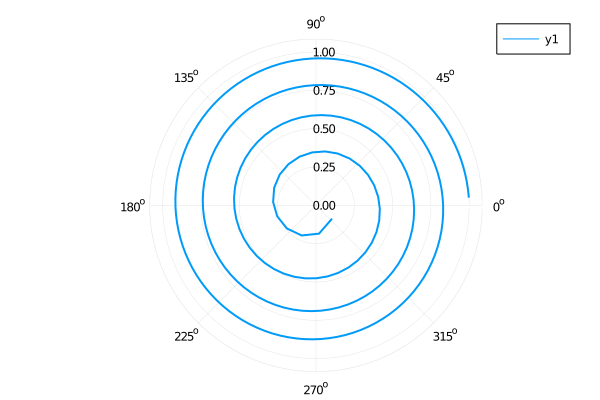

In [14]:
R, Θ = Z[:, 1]/a₀, Z[:, 2]/5e4 # радиус нормировать на бора, а углы спресовать
plot(Θ, R, proj = :polar, line = 2 )

In [15]:
R, Θ = Z[:, 1]/a₀, Z[:, 2]/5e4
Xs = R.*cos.(Θ)
Ys = R.*sin.(Θ);

In [25]:
for i in 4:4:length(R) # картинки для гифки
    plot(Xs[1:i], Ys[1:i], line = 2, leg = false, ticks = nothing, border = :none, size = (780, 440) )
    xaxis!((-1.0,1.0)); yaxis!((-1.0,1.0));
    scatter!( [Xs[i]], [Ys[i]], m = (4, :blue) )
    scatter!( [0.0], [0.0],  m = (60, :red) )
    savefig("img$i.png")
end